In [1]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
import darts
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries


import da_transformations as da
import da_forecasting
from da_datasets import UnivariateDataset, get_dataset,get_m3,arange_m3



KeyboardInterrupt: 

In [ ]:
seed = np.random.randint(low = 0,high = 1000)
print(seed)

datasets = ['AirPassengers']
data, seasonality = get_dataset(datasets[0]) 

models = ['RNN','N-BEATS-G','N-BEATS-I','TRANSFORMER','TCN']
models = ['RNN']
split = 0.7
reps = 1
inlen = 12
outlen = 6

119


## Baseline

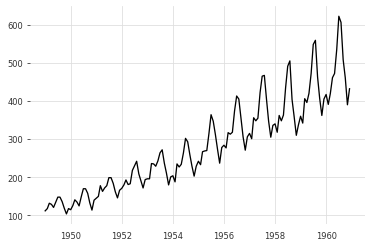

In [ ]:
plt.plot(data)
plt.show()

2022-08-07 17:16:22 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-08-07 17:16:22 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-08-07 17:16:22 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-08-07 17:16:22 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-08-07 17:16:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


(6, 1)


2022-08-07 17:16:28 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K
4 | fc            | Sequential       | 606   
---------------------------------------------------
31.1 K    Trainable params
0         Non-trainable params
31.1 K    Total params
0.249     Total estimated model params size (MB)


Epoch 81:  67%|██████▋   | 2/3 [00:00<00:00, 56.47it/s, loss=0.00369, train_loss=0.00286] 

/home/lirannoc/.conda/envs/da/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
2022-08-07 17:16:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 100%|██████████| 2/2 [00:00<?, ?it/s]


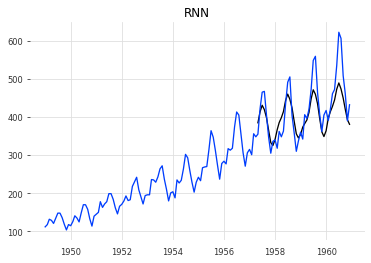

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,AirPassengers,RNN,7.81392,46.555,8.027,0.0,0.0,0.0,0,[],[]


In [ ]:

aug_n = 0 # number of operations
aug_m = [] # magnitude per operation
aug_p = [] # probability density function for the transformations
baseline_result  = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed = seed)      
baseline_result


# Identity

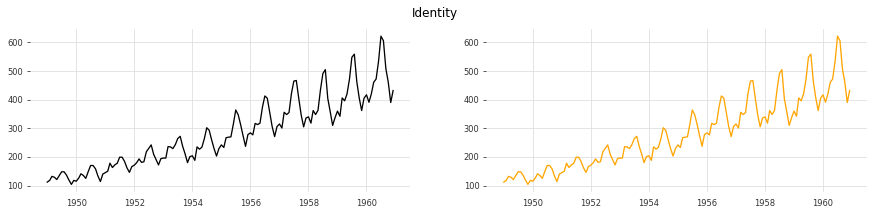

In [ ]:
da.plot_augmentation(data,seasonality,"Identity")

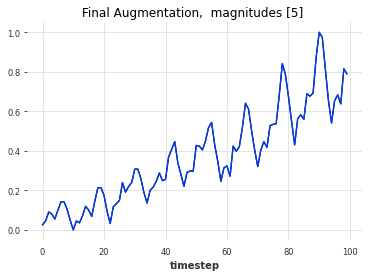

2022-07-28 17:46:59 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 17:46:59 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 17:46:59 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 17:46:59 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 17:46:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 17:46:59 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 17:46:59 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 6/6 [00:00<00:00, 174.20it/s, loss=0.00235, train_loss=0.00512] 


2022-07-28 17:47:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 6it [00:00, ?it/s]


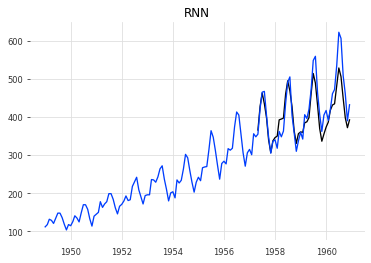

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,AirPassengers,RNN,6.225,36.36,6.392,0.0,0.0,0.0,1,[5],"[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]"


In [ ]:

aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='Identity').astype(int)]
iden_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed=seed)
iden_results

# Jittering

In [ ]:
da.plot_augmentation(data,seasonality,"Jittering")

In [ ]:

aug_n = 1
aug_m = [1]
aug_p = [(np.array(list(da.ranges.keys()))=='Jittering').astype(int)]
jitter_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed = seed) 
jitter_results

# Flip

In [ ]:
da.plot_augmentation(data,seasonality,"Flip")

In [ ]:
aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='Flip').astype(int)]
flip_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed=seed)
flip_results

# Trend Scale

In [ ]:
da.plot_augmentation(data,seasonality,"Trend Scale")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Trend Scale').astype(int)]
trend_scale_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
trend_scale_results

# Permutation

In [ ]:
da.plot_augmentation(data,seasonality,"Permutation")

In [ ]:
aug_n = 1
aug_m = [6]
aug_p = [(np.array(list(da.ranges.keys()))=='Permutation').astype(int)]
perm_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
perm_results


# Scale

In [ ]:
da.plot_augmentation(data,seasonality,"Scale")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Scale').astype(int)]
scale_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
scale_results

# Reverse

In [ ]:
da.plot_augmentation(data,seasonality,"Reverse")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Reverse').astype(int)]
reverse_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
reverse_results

# Smoothing - Temporal Smoothness (Least Squares)

In [ ]:
da.plot_augmentation(data,seasonality,"Smooth LS")

In [ ]:
aug_n = 1
aug_m = [4]
aug_p = [(np.array(list(da.ranges.keys()))=='Smooth LS').astype(int)]
ls_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ls_results

# Smoothing ETS

In [ ]:
da.plot_augmentation(data,seasonality,"Smooth ETS")

In [ ]:
aug_n = 1
aug_m = [4]
aug_p = [(np.array(list(da.ranges.keys()))=='Smooth ETS').astype(int)]
ets_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ets_results

# MBB

In [ ]:
da.plot_augmentation(data,seasonality,"MBB")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='MBB').astype(int)]
mbb_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mbb_results

# Gaussian time warping

In [ ]:

da.plot_augmentation(data,seasonality,"Gaussian TW")

In [ ]:
aug_n = 1
aug_m = [2]
aug_p = [(np.array(list(da.ranges.keys()))=='Gaussian TW').astype(int)]
gtw_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
gtw_results

# Dynamic Time Stretching

In [ ]:
da.plot_augmentation(data,seasonality,"DTS")

In [ ]:
aug_n = 1
aug_m = [6]
aug_p = [(np.array(list(da.ranges.keys()))=='DTS').astype(int)]
dts_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
dts_results

# Window Warping

In [ ]:
da.plot_augmentation(data,seasonality,"Window Warping")

In [ ]:
aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='DTS').astype(int)]
ww_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ww_results

# Save results

In [ ]:
results = []
results.append(dts_results)
results.append(gtw_results)
results.append(mbb_results)
results.append(ets_results)
results.append(ls_results)
results.append(reverse_results)
results.append(scale_results)
results.append(perm_results)
results.append(trend_scale_results)
results.append(flip_results)
results.append(jitter_results)
results.append(iden_results)
results.append(baseline_result)
results.append(ww_results)

aug_results = pd.concat(results)
aug_results['seed']  = seed

In [ ]:
aug_results.to_excel(datasets[0]+"/seed_"+str(seed)+"_aug_results1.xlsx")

In [ ]:
seed